<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Scenario-1" data-toc-modified-id="Scenario-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scenario 1</a></span><ul class="toc-item"><li><span><a href="#Solving-with-ICU" data-toc-modified-id="Solving-with-ICU-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Solving with ICU</a></span></li><li><span><a href="#Solving-with-Outer-Loop" data-toc-modified-id="Solving-with-Outer-Loop-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Solving with Outer Loop</a></span></li></ul></li><li><span><a href="#Scenario-2" data-toc-modified-id="Scenario-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scenario 2</a></span><ul class="toc-item"><li><span><a href="#Solving-with-ICU" data-toc-modified-id="Solving-with-ICU-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Solving with ICU</a></span></li><li><span><a href="#Solving-with-Outer-Loop" data-toc-modified-id="Solving-with-Outer-Loop-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Solving with Outer Loop</a></span></li></ul></li></ul></div>

# Description

This notebook aims at testing the two main algorithms on larger graphs in order to test for the scalability of the approach

# Load

In [264]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from graph import expand_graph

import pandas as pd
import os

from graph import construct_graph

from graph import get_edge_list

from FW_icu import modified_FW

from FW_OuterUpdate import solve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Scenario 1

In [265]:
path='Data/2Nodes/'

In [266]:
G_0, OD = construct_graph(path)

In [268]:
edge_list=get_edge_list(G_0)

## Solving with ICU

In [269]:
#How to compute a stopping criterion? 
G_icu,y_list,opt_res,OD_list=modified_FW(G_0.copy(),OD.copy(),edge_list,maxIter=400,
                         step='fixed',rebalancer_smoothing=True, ri_smoothing=False,evolving_bounds=False)

## Solving with Outer Loop

In [270]:
#tol: difference in ri between two iterations
#FW_tol: value of the certificate

G_FW,ri_FW = solve(G_0.copy(),OD.copy(),edge_list,tol=10**-4, FW_tol=10**-4)

##########################################
ITERATION #:  1
CURRENT RI_k
{'1': 0, '1_p': 0, '2': 0, '2_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 10, ('2', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 0}
Cost at the beginning of the iteration:
('1', '2')  :  41.4
('1', 'R')  :  10000000000000000000000
('1', '2_p')  :  134.0
('1', '1_p')  :  154.0
('2', '1')  :  36.0
('2', 'R')  :  10000000000000000000000
('2', '1_p')  :  716.6666666666669
('2', '2_p')  :  154.0
Flows at the beginning of the iteration:
('1', '2')  :  10
('1', 'R')  :  0
('1', '2_p')  :  0
('1', '1_p')  :  0
('2', '1')  :  0
('2', 'R')  :  0
('2', '1_p')  :  10
('2', '2_p')  :  10
##########################################
ITERATION #:  2
CURRENT RI_k
{'1': 5.6397357602358404, '1_p': 0, '2': -5.6397357602358404, '2_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 10, ('2', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 5.6397357602358404}
Cost at the beginning of the iteration:
('1', '2')  :  41.4
('1', 'R')  :  41.4
('1', '2_p')  :  134.0
('1

In [271]:
from compare_outputs import compare_final
from helpers_icu import print_final_flows, print_final_cost

In [272]:
compare_final(G_icu,G_FW,'flow')

('1', '2')  :  0.01 %
('1', 'R')  :  0.24 %
('1', '2_p')  :  0.0 %
('1', '1_p')  :  0.01 %
('2', '1')  :  0.24 %
('2', 'R')  :  0.0 %
('2', '1_p')  :  0.01 %
('2', '2_p')  :  0.0 %


In [273]:
compare_final(G_icu,G_FW,'cost')

('1', '2')  :  0.05 %
('1', 'R')  :  0.29 %
('1', '2_p')  :  0.0 %
('1', '1_p')  :  0.0 %
('2', '1')  :  0.01 %
('2', 'R')  :  0.0 %
('2', '1_p')  :  1.79 %
('2', '2_p')  :  0.0 %


In [255]:
from helpers_icu import plot_cost_all_path, plot_inv_demand

phi, k: 36.0 3.0
phi, k: 36.0 3.0
phi, k: 36.0 3.0
phi, k: 36.0 3.0


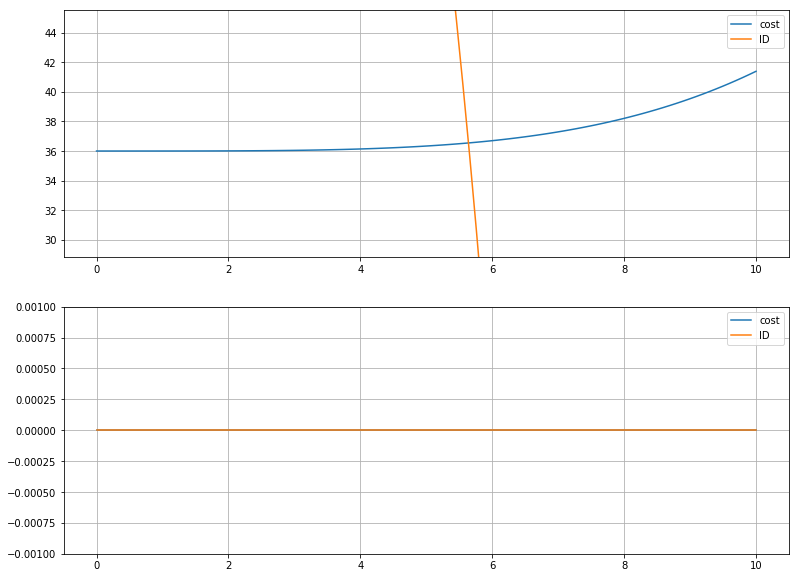

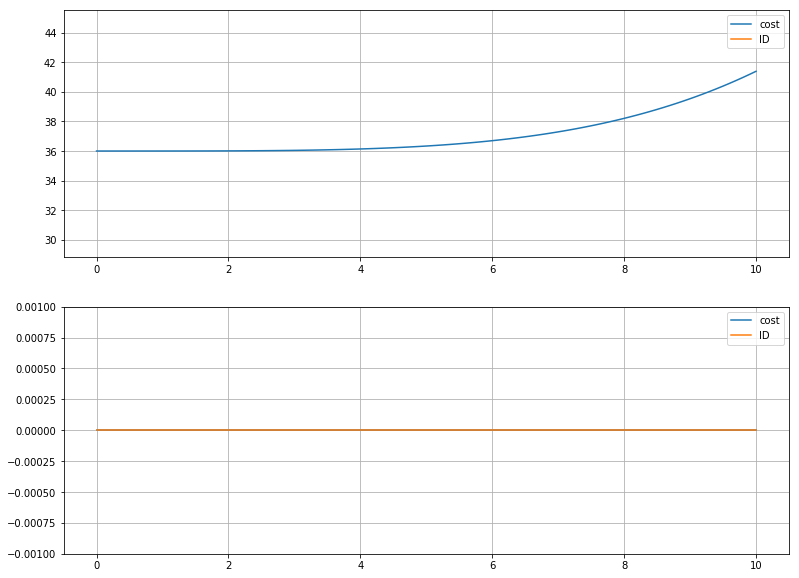

In [279]:
plot_cost_all_path(G_0, OD, '1', '1_p')

plot_cost_all_path(G_0, OD, '2', '2_p')

In [259]:
G_0.edges.data()


OutEdgeDataView([('1', '2', {'k': 10.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('1', 'R', {'k': 1.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('1', '2_p', {'k': 3.0, 'phi': 36.0, 'sign': -1.0, 'f_m': 0, 'f_r': 0, 'shift': 150.0, 'cost': 51.0}), ('1', '1_p', {'k': 1.0, 'phi': 0.0, 'sign': 1.0, 'f_m': 10, 'f_r': 0, 'shift': 0.0, 'cost': 165.0}), ('2', '1', {'k': 10.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('2', 'R', {'k': 1.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('2', '1_p', {'k': 3.0, 'phi': 36.0, 'sign': -1.0, 'f_m': 0, 'f_r': 0, 'shift': 150.0, 'cost': 51.0}), ('2', '2_p', {'k': 1.0, 'phi': 0.0, 'sign': 1.0, 'f_m': 10, 'f_r': 0, 'shift': 0.0, 'cost': 165.0})])

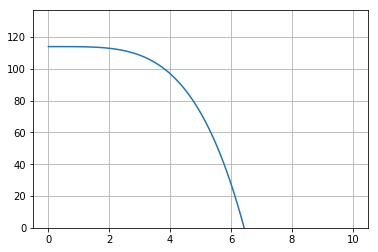

In [263]:
plot_inv_demand(10, 36, 3, 150)



# Scenario 2

In [286]:
path='Data/3Nodes/'

In [288]:
G_0, OD = construct_graph(path)

In [290]:
edge_list=get_edge_list(G_0)

In [291]:
edge_list

[('1', '2'),
 ('1', '3'),
 ('1', 'R'),
 ('1', '2_p'),
 ('1', '3_p'),
 ('1', '1_p'),
 ('2', '1'),
 ('2', '3'),
 ('2', 'R'),
 ('2', '1_p'),
 ('2', '2_p'),
 ('3', '1'),
 ('3', '2'),
 ('3', 'R'),
 ('3', '1_p'),
 ('3', '3_p')]

## Solving with ICU

In [292]:
#How to compute a stopping criterion? 
G_icu,y_list,opt_res,OD_list=modified_FW(G_0.copy(),OD.copy(),edge_list,maxIter=400,
                         step='fixed',rebalancer_smoothing=True, ri_smoothing=False,evolving_bounds=False)

## Solving with Outer Loop

In [298]:
#tol: difference in ri between two iterations
#FW_tol: value of the certificate

G_FW,ri_FW = solve(G_0.copy(),OD.copy(),edge_list,tol=10**-4, FW_tol=10**-4)

##########################################
ITERATION #:  1
CURRENT RI_k
{'1': 0, '1_p': 0, '2': 0, '2_p': 0, '3': 0, '3_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 20, ('2', '2_p'): 10, ('3', '3_p'): 10, ('1', 'R'): 0, ('2', 'R'): 0, ('3', 'R'): 0}
Cost at the beginning of the iteration:
('1', '2')  :  122.39999999999999
('1', '3')  :  36.0
('1', 'R')  :  10000000000000000000000
('1', '2_p')  :  717.6666666666669
('1', '3_p')  :  717.6666666666669
('1', '1_p')  :  165.0
('2', '1')  :  41.4
('2', '3')  :  36.0
('2', 'R')  :  10000000000000000000000
('2', '1_p')  :  10717.66666666667
('2', '2_p')  :  165.0
('3', '1')  :  41.4
('3', '2')  :  36.0
('3', 'R')  :  10000000000000000000000
('3', '1_p')  :  51.0
('3', '3_p')  :  165.0
Flows at the beginning of the iteration:
('1', '2')  :  20
('1', '3')  :  0
('1', 'R')  :  0
('1', '2_p')  :  10
('1', '3_p')  :  10
('1', '1_p')  :  0
('2', '1')  :  10
('2', '3')  :  0
('2', 'R')  :  0
('2', '1_p')  :  20
('2', '2_p')  :  0
('3', '1')  :  10
('3',

In [299]:
from compare_outputs import compare_final
from helpers_icu import print_final_flows, print_final_cost

In [300]:
compare_final(G_icu,G_FW,'flow')

('1', '2')  :  2.21 %
('1', '3')  :  1.15 %
('1', 'R')  :  100.0 %
('1', '2_p')  :  0.77 %
('1', '3_p')  :  0.87 %
('1', '1_p')  :  0.21 %
('2', '1')  :  6.31 %
('2', '3')  :  inf %
('2', 'R')  :  0.0 %
('2', '1_p')  :  1.46 %
('2', '2_p')  :  1.07 %
('3', '1')  :  4.26 %
('3', '2')  :  inf %
('3', 'R')  :  0.0 %
('3', '1_p')  :  1.15 %
('3', '3_p')  :  1.22 %


/Users/lucasfuentes/ASL/ICU/notebooks/compare_outputs.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  diff_rel=abs((att_FW-att_icu)/att_FW)


In [301]:
compare_final(G_icu,G_FW,'cost')

('1', '2')  :  0.01 %
('1', '3')  :  0.01 %
('1', 'R')  :  2.4154589371980665e+22 %
('1', '2_p')  :  0.56 %
('1', '3_p')  :  0.29 %
('1', '1_p')  :  0.0 %
('2', '1')  :  0.56 %
('2', '3')  :  0.0 %
('2', 'R')  :  100.0 %
('2', '1_p')  :  2.29 %
('2', '2_p')  :  0.0 %
('3', '1')  :  0.39 %
('3', '2')  :  0.0 %
('3', 'R')  :  0.0 %
('3', '1_p')  :  0.39 %
('3', '3_p')  :  0.0 %


In [304]:
print_final_flows(G_icu)
print('---------------')
print_final_flows(G_FW)

('1', '2')  :  5.975465680479828
('1', '3')  :  5.790390858887693
('1', 'R')  :  0.0
('1', '2_p')  :  5.788410210446443
('1', '3_p')  :  5.7822337205614325
('1', '1_p')  :  8.278096028631657
('2', '1')  :  6.2150537914176445
('2', '3')  :  0.7508497169868468
('2', 'R')  :  0.0
('2', '1_p')  :  5.93151311248064
('2', '2_p')  :  4.2115897895535435
('3', '1')  :  6.1075858794246365
('3', '2')  :  0.11505036838403786
('3', 'R')  :  0.0
('3', '1_p')  :  5.790390858887693
('3', '3_p')  :  4.217766279438559
---------------
('1', '2')  :  5.846275308488913
('1', '3')  :  5.857969316671287
('1', 'R')  :  0.0378922878422037
('1', '2_p')  :  5.833082472670368
('1', '3_p')  :  5.833269864647629
('1', '1_p')  :  8.295755374839771
('2', '1')  :  5.846275308488913
('2', '3')  :  0.0
('2', 'R')  :  0.0
('2', '1_p')  :  5.846275308488913
('2', '2_p')  :  4.166917527329633
('3', '1')  :  5.857969316671287
('3', '2')  :  0.0
('3', 'R')  :  0.0
('3', '1_p')  :  5.857969316671287
('3', '3_p')  :  4.1667301

In [305]:
print_final_cost(G_icu)
print('---------------')
print_final_flows(G_FW)

('1', '2')  :  36.625578355639526
('1', '3')  :  36.63182542172931
('1', 'R')  :  10000000000000000000000
('1', '2_p')  :  128.89646690023636
('1', '3_p')  :  128.56452276027989
('1', '1_p')  :  165.0
('2', '1')  :  36.836292419766075
('2', '3')  :  36.00017163499648
('2', 'R')  :  36.0
('2', '1_p')  :  125.93067605578047
('2', '2_p')  :  165.0
('3', '1')  :  36.78041008421077
('3', '2')  :  36.00000009461191
('3', 'R')  :  10000000000000000000000
('3', '1_p')  :  129.00313848510007
('3', '3_p')  :  165.0
---------------
('1', '2')  :  5.846275308488913
('1', '3')  :  5.857969316671287
('1', 'R')  :  0.0378922878422037
('1', '2_p')  :  5.833082472670368
('1', '3_p')  :  5.833269864647629
('1', '1_p')  :  8.295755374839771
('2', '1')  :  5.846275308488913
('2', '3')  :  0.0
('2', 'R')  :  0.0
('2', '1_p')  :  5.846275308488913
('2', '2_p')  :  4.166917527329633
('3', '1')  :  5.857969316671287
('3', '2')  :  0.0
('3', 'R')  :  0.0
('3', '1_p')  :  5.857969316671287
('3', '3_p')  :  4.16

In [255]:
from helpers_icu import plot_cost_all_path, plot_inv_demand

/Users/lucasfuentes/ASL/ICU/notebooks/helpers_icu.py:338: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  axes[i].legend()


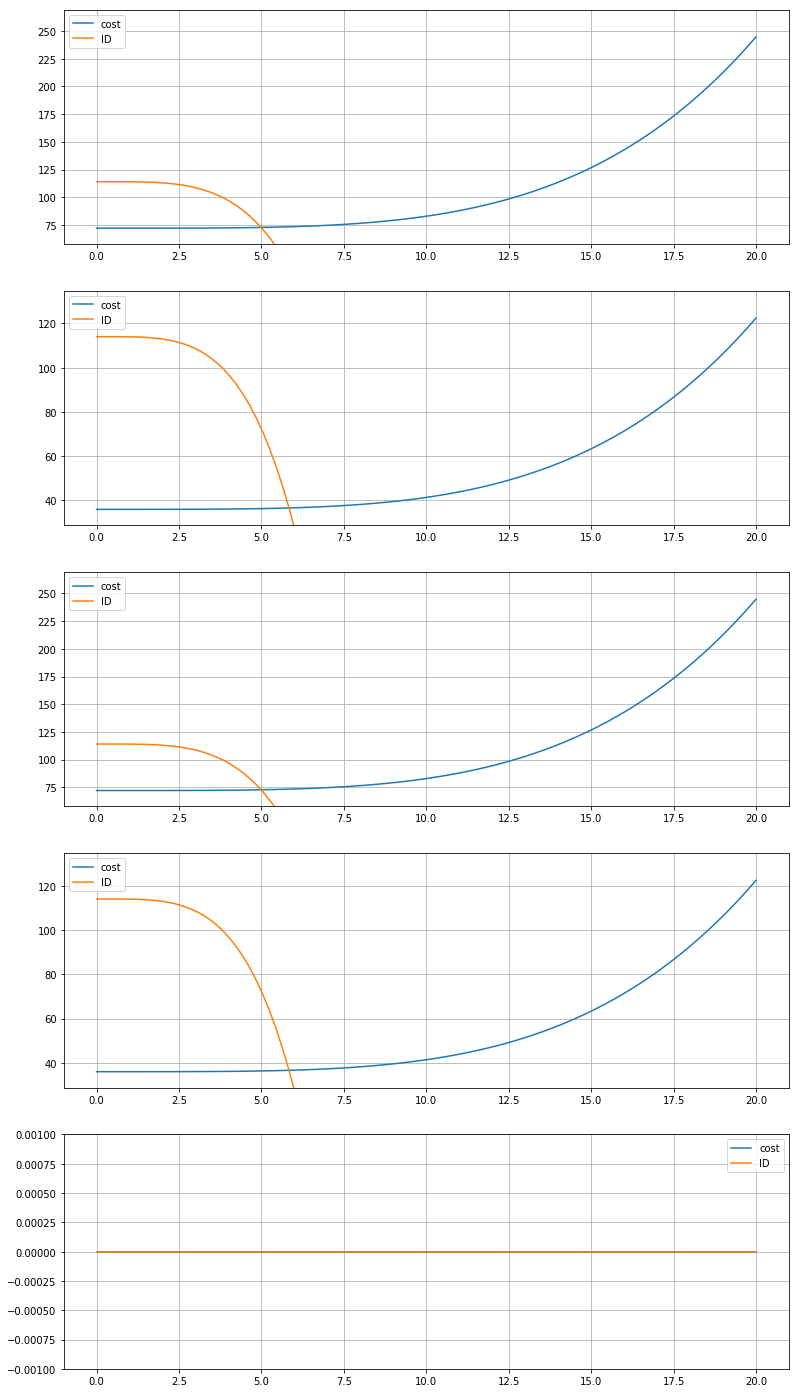

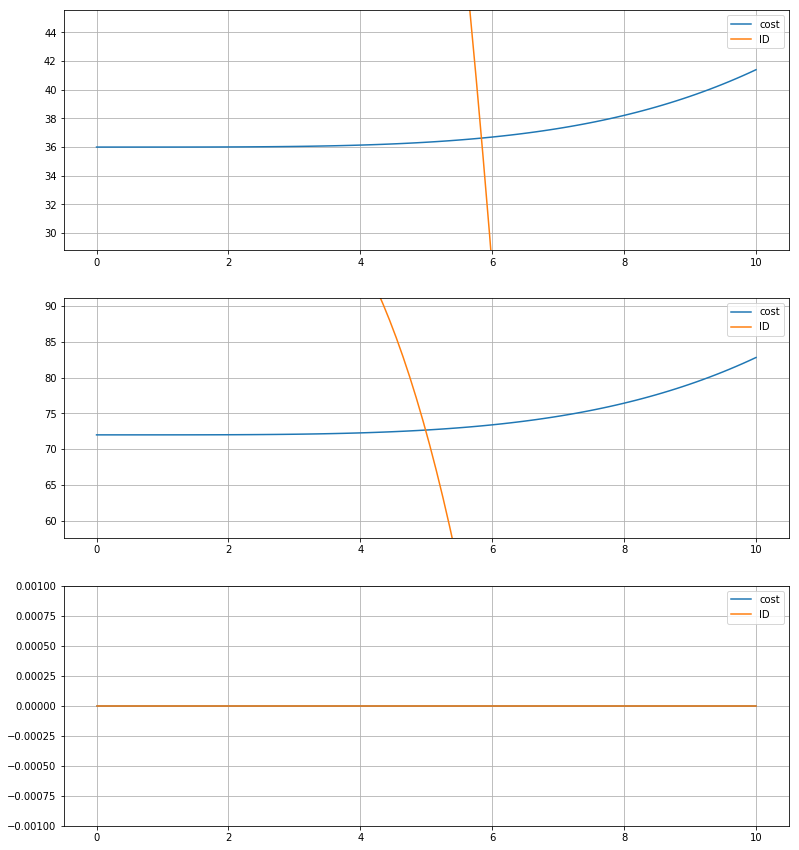

In [307]:
plot_cost_all_path(G_0, OD, '1', '1_p')

plot_cost_all_path(G_0, OD, '2', '2_p')

In [259]:
G_0.edges.data()


OutEdgeDataView([('1', '2', {'k': 10.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('1', 'R', {'k': 1.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('1', '2_p', {'k': 3.0, 'phi': 36.0, 'sign': -1.0, 'f_m': 0, 'f_r': 0, 'shift': 150.0, 'cost': 51.0}), ('1', '1_p', {'k': 1.0, 'phi': 0.0, 'sign': 1.0, 'f_m': 10, 'f_r': 0, 'shift': 0.0, 'cost': 165.0}), ('2', '1', {'k': 10.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('2', 'R', {'k': 1.0, 'phi': 36.0, 'sign': 1.0, 'f_m': 0, 'f_r': 0, 'shift': 0.0, 'cost': 36.0}), ('2', '1_p', {'k': 3.0, 'phi': 36.0, 'sign': -1.0, 'f_m': 0, 'f_r': 0, 'shift': 150.0, 'cost': 51.0}), ('2', '2_p', {'k': 1.0, 'phi': 0.0, 'sign': 1.0, 'f_m': 10, 'f_r': 0, 'shift': 0.0, 'cost': 165.0})])

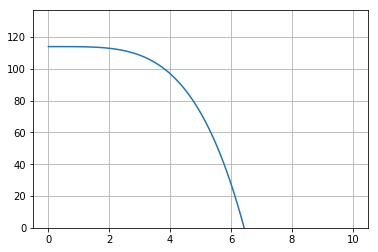

In [263]:
plot_inv_demand(10, 36, 3, 150)

